# Country Quality of Life Analysis

## Initialization

### Setup

- Import pandas, numpy, and matplotlib
- Load CSV
- Check for proper headers, id, and data validation

In [5]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Initializing Scaler.
scaler = MinMaxScaler()

In [7]:
# Import CSV File.
file_path = 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Country_Analysis_Mastertable.csv'
df = pd.read_csv(file_path)

In [8]:
# Check Data, Index, Headers.
df.head()

,1,Afghanistan,AF,32.15,Very Low,25.33,Low,24.24,Low.1,\N,...,78.40,0.28,38041754,48.90,9.30,71.40,11.12,9797273,33.93911,67.709953
0,2,Aland Islands,AX,125.01,Very High,71.81,High,79.72,High,\N,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,3,Albania,AL,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,...,56.90,1.20,2854191,55.70,18.60,36.60,12.33,1747593,41.153332,20.168331
2,4,Alderney,GG,\N,NaN,83.79,Very High,100,Very High,\N,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,5,Algeria,DZ,27.6,Very Low,47.54,Moderate,54.43,Moderate,94.82,...,28.10,1.72,43053054,41.20,37.20,66.10,11.70,31510100,28.033886,1.659626
4,6,American Samoa,AS,\N,NaN,54.41,Moderate,\N,NaN,\N,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [9]:
# Check Columns, Nulls, Data Types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 54 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   1            235 non-null    int64 
 1   Afghanistan  235 non-null    object
 2   AF           234 non-null    object
 3   32.15        235 non-null    object
 4   Very Low     189 non-null    object
 5   25.33        235 non-null    object
 6   Low          233 non-null    object
 7   24.24        235 non-null    object
 8   Low.1        220 non-null    object
 9   \N           235 non-null    object
 10  None         115 non-null    object
 11  21.08        235 non-null    object
 12  Very Low.1   190 non-null    object
 13  7.8          235 non-null    object
 14  Low.2        213 non-null    object
 15  56.17        235 non-null    object
 16  Very High    201 non-null    object
 17  84.44        235 non-null    object
 18  Very High.1  225 non-null    object
 19  \N.1         235 non-null    

In [10]:
# Expanding display.
pd.set_option('display.max.rows', 250)
pd.set_option('display.max.columns', 70)

In [11]:
# Checking Nulls for Data Integrity.
df.isnull().sum().sort_values(ascending=False).head(10)

None.1         121
None           120
Very Low        46
Very Low.1      45
Very High       34
Low.2           22
Low.1           15
Very High.1     10
Pashto           4
Low              2
dtype: int64

**Observations**
- Missing headers/column labels, NULLs not lining up. ('Cost of Living Category' and 'Quality of Life Category' have more NULLs than most columns.)

### Reupload CSV

- Edited CSV file in Excel to fix headers.
- Reupload

In [15]:
# Reimporting new CSV file.
df = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Country_Analysis_Mastersheet.csv', index_col = 'id') 

In [16]:
df.head()

,country,abbreviation,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category,density_p_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,cpi,cpi_change_percent,currency_code,fertility_rate,forested_area_percent,gasoline_price,gdp,gross_primary_education_enrollment_percent,gross_tertiary_education_enrollment_percent,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure_percent,physicians_per_thousand,population,labor_force_participation_percent,tax_revenue_percent,total_tax_rate_percent,unemployment_rate_percent,urban_population,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Afghanistan,AF,32.15,Very Low,25.33,Low,24.24,Low,\N,NaN,21.08,Very Low,7.8,Low,56.17,Very High,84.44,Very High,\N,NaN,60,58,652230,323000,32.49,93,Kabul,8672,149.9,2.3,AFN,4.47,2.1,0.7,19101353833,104,9.7,47.9,Kabul,64.5,638,0.43,Pashto,78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,33.93911,67.709953
2,Aland Islands,AX,125.01,Very High,71.81,High,79.72,High,\N,NaN,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,\N,NaN,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,Albania,AL,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low,105,43,28748,9000,11.78,355,Tirana,4536,119.05,1.4,ALL,1.62,28.1,1.36,15278077447,107,55,7.8,Tirana,78.5,15,1.12,Albanian,56.9,1.2,2854191,55.7,18.6,36.6,12.33,1747593,41.153332,20.168331
4,Alderney,GG,\N,NaN,83.79,Very High,100,Very High,\N,NaN,\N,NaN,\N,NaN,5,Very Low,1.72,Very Low,\N,NaN,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
5,Algeria,DZ,27.6,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.7,Very High,45.09,High,63.87,High,98.83,Very Low,18,17,2381741,317000,24.28,213,Algiers,150006,151.36,2,DZD,3.02,0.8,0.28,1.69988E+11,109.9,51.4,20.1,Algiers,76.7,112,0.95,Arabic,28.1,1.72,43053054,41.2,37.2,66.1,11.7,31510100,28.033886,1.659626


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   country                                      236 non-null    object
 1   abbreviation                                 235 non-null    object
 2   Purchasing Power Value                       236 non-null    object
 3   Purchasing Power Category                    190 non-null    object
 4   Safety Value                                 236 non-null    object
 5   Safety Category                              234 non-null    object
 6   Health Care Value                            236 non-null    object
 7   Health Care Category                         221 non-null    object
 8   Climate Value                                236 non-null    object
 9   Climate Category                             115 non-null    object
 10  Cost of Living Valu

**Observations**
- New DataFrame has proper Headers.
- Nulls not lining up between numeric and categorical columns.
- Data Types did not carry over from MySQL (not stored in CSV). Will reset after fixing NULLs and narrowing down columns.

### First Impressions

In [20]:
# Checking 'Cost of Living Category' and 'Quality of Life Category' first.
df[['country', 'Cost of Living Value', 'Cost of Living Category', 'Quality of Life Value', 'Quality of Life Category']]

,country,Cost of Living Value,Cost of Living Category,Quality of Life Value,Quality of Life Category
id,,,,,
1,Afghanistan,21.08,Very Low,\N,NaN
2,Aland Islands,53.44,Low,\N,NaN
3,Albania,40.85,Low,104.16,Low
4,Alderney,\N,NaN,\N,NaN
5,Algeria,25.31,Very Low,98.83,Very Low
6,American Samoa,\N,NaN,\N,NaN
7,Andorra,48.09,Low,\N,NaN
8,Angola,42.57,Low,\N,NaN
9,Anguilla,\N,NaN,\N,NaN


In [21]:
# Quick glance at all rows.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.loc[df[['Cost of Living Category', 'Quality of Life Category']].isnull().any(axis=1), ['country', 'Cost of Living Value', 'Cost of Living Category', 'Quality of Life Value', 'Quality of Life Category']])

,country,Cost of Living Value,Cost of Living Category,Quality of Life Value,Quality of Life Category
id,,,,,
1,Afghanistan,21.08,Very Low,\N,NaN
2,Aland Islands,53.44,Low,\N,NaN
4,Alderney,\N,NaN,\N,NaN
6,American Samoa,\N,NaN,\N,NaN
7,Andorra,48.09,Low,\N,NaN
8,Angola,42.57,Low,\N,NaN
9,Anguilla,\N,NaN,\N,NaN
10,Antigua And Barbuda,\N,NaN,\N,NaN
13,Aruba,79.42,High,\N,NaN


In [22]:
# Comparing linked columns for accuracy.
df[['Cost of Living Value', 'Cost of Living Category']].isnull().sum()

Cost of Living Value        0
Cost of Living Category    45
dtype: int64

In [23]:
df[['Quality of Life Value', 'Quality of Life Category']].isnull().sum()

Quality of Life Value         0
Quality of Life Category    122
dtype: int64

**Observation**
- Our Categorical and Numeric Values are not lining up. 
- Taking a look at our Nulls, it seems some got read in as '\N', which Python does not reas as NULL.
- Will convert to NaNs.

## Cleaning & Prep

Distill data, selecting important columns across core categories:
- Finances
- Health
- Safety
- Environment
- Education
- Opportunity

Data Cleaning
- Handle NULLs (replace '\N's, leave nulls in place, already cleaned in SQL).
- Correct DataTypes

### Backup & Repair Nulls

In [28]:
# Creating Staging DataFrame (Backup).
df_staging = df.copy()

In [29]:
# Replace '\N' with NaN across all columns.
df.replace({'\\N': np.nan}, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   country                                      236 non-null    object
 1   abbreviation                                 235 non-null    object
 2   Purchasing Power Value                       187 non-null    object
 3   Purchasing Power Category                    187 non-null    object
 4   Safety Value                                 231 non-null    object
 5   Safety Category                              231 non-null    object
 6   Health Care Value                            218 non-null    object
 7   Health Care Category                         218 non-null    object
 8   Climate Value                                112 non-null    object
 9   Climate Category                             112 non-null    object
 10  Cost of Living Valu

**Note**
- Nulls match between numeric and categorical columns. Ready for filtering.

### Correct DataTypes

In [33]:
df

,country,abbreviation,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category,density_p_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,cpi,cpi_change_percent,currency_code,fertility_rate,forested_area_percent,gasoline_price,gdp,gross_primary_education_enrollment_percent,gross_tertiary_education_enrollment_percent,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure_percent,physicians_per_thousand,population,labor_force_participation_percent,tax_revenue_percent,total_tax_rate_percent,unemployment_rate_percent,urban_population,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Afghanistan,AF,32.15,Very Low,25.33,Low,24.24,Low,NaN,NaN,21.08,Very Low,7.8,Low,56.17,Very High,84.44,Very High,NaN,NaN,60,58,652230,323000,32.49,93,Kabul,8672,149.9,2.3,AFN,4.47,2.1,0.7,19101353833,104,9.7,47.9,Kabul,64.5,638,0.43,Pashto,78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,33.93911,67.709953
2,Aland Islands,AX,125.01,Very High,71.81,High,79.72,High,NaN,NaN,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,AL,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low,105,43,28748,9000,11.78,355,Tirana,4536,119.05,1.4,ALL,1.62,28.1,1.36,15278077447,107,55,7.8,Tirana,78.5,15,1.12,Albanian,56.9,1.2,2854191,55.7,18.6,36.6,12.33,1747593,41.153332,20.168331
4,Alderney,GG,NaN,NaN,83.79,Very High,100,Very High,NaN,NaN,NaN,NaN,NaN,NaN,5,Very Low,1.72,Very Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,DZ,27.6,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.7,Very High,45.09,High,63.87,High,98.83,Very Low,18,17,2381741,317000,24.28,213,Algiers,150006,151.36,2,DZD,3.02,0.8,0.28,1.69988E+11,109.9,51.4,20.1,Algiers,76.7,112,0.95,Arabic,28.1,1.72,43053054,41.2,37.2,66.1,11.7,31510100,28.033886,1.659626
6,American Samoa,AS,NaN,NaN,54.41,Moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,Very High,78.45,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Andorra,AD,121.14,Very High,84.71,Very High,75.56,High,NaN,NaN,48.09,Low,9.03,Moderate,13.33,Very Low,22.98,Low,NaN,NaN,164,40,468,NaN,7.2,376,Andorra la Vella,469,NaN,NaN,EUR,1.27,34,1.51,3154057987,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142,NaN,NaN,NaN,NaN,67873,42.506285,1.521801
8,Angola,AO,224.46,Very High,33.71,Low,36.58,Low,NaN,NaN,42.57,Low,8.01,Moderate,65.43,Very High,92.07,Very High,NaN,NaN,26,48,1246700,117000,40.73,244,Luanda,34693,261.73,17.1,AOA,5.52,46.3,0.97,94635415870,113.5,9.3,51.6,Luanda,60.8,241,0.71,Portuguese,33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025,-11.202692,17.873887
9,Anguilla,AI,NaN,NaN,75.44,High,77.08,High,NaN,NaN,NaN,NaN,1.84,Very Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# All values are currently 'objects'. Need float columns for numeric calculations.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   country                                      236 non-null    object
 1   abbreviation                                 235 non-null    object
 2   Purchasing Power Value                       187 non-null    object
 3   Purchasing Power Category                    187 non-null    object
 4   Safety Value                                 231 non-null    object
 5   Safety Category                              231 non-null    object
 6   Health Care Value                            218 non-null    object
 7   Health Care Category                         218 non-null    object
 8   Climate Value                                112 non-null    object
 9   Climate Category                             112 non-null    object
 10  Cost of Living Valu

In [35]:
numeric_columns = ['Purchasing Power Value','Safety Value','Health Care Value','Climate Value','Cost of Living Value',
                      'Property Price to Income Value','Traffic Commute Time Value','Pollution Value','Quality of Life Value','density_p_km2',
                      'agricultural_land_percent','land_area_km2','armed_forces_size','birth_rate','calling_code','co2_emissions','cpi',
                      'cpi_change_percent','fertility_rate','forested_area_percent','gasoline_price','gdp','gross_primary_education_enrollment_percent',
                      'gross_tertiary_education_enrollment_percent','infant_mortality','life_expectancy','maternal_mortality_ratio','minimum_wage',
                      'out_of_pocket_health_expenditure_percent','physicians_per_thousand','population','labor_force_participation_percent',
                      'tax_revenue_percent','total_tax_rate_percent','unemployment_rate_percent','urban_population','latitude','longitude']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

**Note:**
- After checking df.info() again, everything looks great!
- Ready for Exploratory Analysis.

## Exploratory Analysis

In [39]:
df.describe()

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Property Price to Income Value,Traffic Commute Time Value,Pollution Value,Quality of Life Value,density_p_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,co2_emissions,cpi,cpi_change_percent,fertility_rate,forested_area_percent,gasoline_price,gdp,gross_primary_education_enrollment_percent,gross_tertiary_education_enrollment_percent,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure_percent,physicians_per_thousand,population,labor_force_participation_percent,tax_revenue_percent,total_tax_rate_percent,unemployment_rate_percent,urban_population,latitude,longitude
count,187.000000,231.000000,218.000000,112.000000,188.000000,211.000000,199.000000,222.000000,111.000000,180.000000,180.000000,1.800000e+02,1.590000e+02,180.000000,180.000000,1.790000e+02,171.000000,172.000000,180.000000,177.000000,166.000000,1.800000e+02,179.000000,176.000000,180.000000,179.000000,174.000000,147.000000,177.000000,180.000000,1.800000e+02,169.000000,162.000000,175.000000,169.000000,1.800000e+02,180.000000,180.000000
mean,69.984813,55.971342,58.673853,78.377679,45.607447,24.622038,33.282261,56.664099,134.938378,132.055556,39.327778,7.386000e+05,1.680629e+05,20.410611,350.355556,1.858552e+05,166.715906,5.798837,2.714000,33.036158,0.997711,5.074669e+11,102.655307,37.823295,21.520000,72.134078,158.028736,2.121224,32.892655,1.817444,4.138939e+07,62.618343,16.580247,41.360571,6.909882,2.314780e+07,19.081149,17.216840
std,49.095440,16.161564,15.296856,15.903587,19.386274,54.393665,13.881747,23.475280,41.819653,147.679243,21.742996,1.986403e+06,3.928662e+05,9.916017,324.064129,8.589189e+05,225.018116,20.705416,1.279397,23.671719,0.345356,2.246415e+12,13.181917,29.495994,19.582658,7.418767,224.931240,2.881671,18.978071,1.659562,1.499974e+08,10.608732,6.900642,20.774050,5.105191,7.730377e+07,24.104687,66.627946
min,2.550000,15.890000,18.520000,20.220000,17.900000,0.550000,2.950000,1.720000,17.470000,2.000000,1.000000,6.100000e+01,1.000000e+03,6.400000,1.000000,6.600000e+01,99.030000,-4.300000,0.980000,0.100000,0.110000,1.946472e+08,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.200000,0.010000,1.823300e+04,38.000000,0.000000,8.000000,0.090000,1.449100e+04,-40.900557,-175.198242
25%,33.510000,44.400000,48.410000,68.252500,31.792500,7.625000,25.675000,38.250000,106.205000,32.000000,21.750000,3.020200e+04,1.200000e+04,11.475000,65.500000,2.987000e+03,113.960000,1.000000,1.710000,12.500000,0.760000,1.097523e+10,99.150000,11.825000,5.975000,66.800000,13.500000,0.400000,17.800000,0.310000,2.754542e+06,55.900000,11.725000,30.750000,3.380000,1.416704e+06,4.788029,-10.007693
50%,53.000000,55.010000,58.230000,80.600000,41.265000,12.410000,32.810000,60.455000,130.420000,83.000000,40.000000,1.553955e+05,3.200000e+04,18.160000,251.500000,1.296300e+04,125.600000,2.300000,2.265000,32.700000,0.980000,3.900235e+10,102.600000,28.950000,14.000000,73.200000,55.500000,1.040000,30.900000,1.460000,9.758033e+06,62.300000,16.400000,37.600000,5.360000,4.918642e+06,17.125346,19.601164
75%,103.545000,68.210000,68.600000,91.497500,55.505000,19.350000,40.160000,74.797500,165.725000,155.750000,55.250000,5.830578e+05,1.470000e+05,28.820000,505.250000,6.721250e+04,156.155000,4.100000,3.597500,49.800000,1.207500,2.398868e+11,108.250000,63.250000,33.125000,77.250000,192.750000,2.330000,44.200000,2.935000,3.047268e+07,68.800000,21.050000,48.600000,9.470000,1.593040e+07,40.087601,47.022272
max,281.830000,100.000000,100.000000,99.890000,137.370000,450.400000,100.000000,106.900000,224.310000,784.000000,83.000000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,2740.270000,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1140.000000,13.590000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


In [40]:
df.corr(numeric_only = True)

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Property Price to Income Value,Traffic Commute Time Value,Pollution Value,Quality of Life Value,density_p_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,co2_emissions,cpi,cpi_change_percent,fertility_rate,forested_area_percent,gasoline_price,gdp,gross_primary_education_enrollment_percent,gross_tertiary_education_enrollment_percent,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure_percent,physicians_per_thousand,population,labor_force_participation_percent,tax_revenue_percent,total_tax_rate_percent,unemployment_rate_percent,urban_population,latitude,longitude
Purchasing Power Value,1.000000,0.481733,0.441191,-0.226490,0.481399,-0.270101,-0.161610,-0.433811,0.865888,0.014528,-0.076078,0.061634,-0.006087,-0.349743,0.009935,0.122505,-0.146106,-0.141147,-0.290089,-0.082988,0.186971,0.192780,-0.008352,0.359042,-0.302614,0.404597,-0.319730,0.621839,-0.484553,0.283423,0.022203,0.120662,0.179760,-0.232391,-0.076275,0.053847,0.229227,0.028639
Safety Value,0.481733,1.000000,0.557476,-0.289278,0.295732,-0.111703,-0.304096,-0.428934,0.572409,0.189350,-0.118331,-0.043690,0.074855,-0.468185,0.119316,0.124336,-0.223822,-0.282473,-0.411242,0.021286,0.163371,0.102600,-0.034434,0.373979,-0.480453,0.482736,-0.445248,0.261336,-0.153006,0.440448,0.054707,0.016630,0.117024,-0.197595,-0.198153,0.066614,0.501158,0.252931
Health Care Value,0.441191,0.557476,1.000000,0.009195,0.249991,-0.171951,-0.088926,-0.432911,0.588079,0.233161,0.022663,0.074649,0.078266,-0.521059,-0.123687,0.153434,-0.154984,-0.155489,-0.500436,-0.038802,0.166799,0.187334,0.016622,0.499518,-0.527934,0.585232,-0.439778,0.476951,-0.298466,0.460478,0.099220,0.002605,0.220609,-0.050581,-0.132351,0.136416,0.256340,0.030783
Climate Value,-0.226490,-0.289278,0.009195,1.000000,0.011738,0.127241,0.048928,-0.034120,-0.037454,-0.012591,0.187522,-0.135862,-0.109792,0.025576,-0.195510,-0.056529,-0.044875,0.120703,-0.017168,-0.027591,0.384523,0.010373,0.184923,0.062006,-0.011038,0.117901,0.028750,0.223948,-0.097201,0.017600,-0.066934,-0.120552,0.407791,0.319750,0.300784,-0.039230,-0.267674,-0.305125
Cost of Living Value,0.481399,0.295732,0.249991,0.011738,1.000000,-0.017241,-0.201317,-0.454763,0.668416,0.150680,-0.219901,-0.083286,-0.230316,-0.267314,-0.147771,-0.035731,-0.124328,-0.095395,-0.194288,0.155529,0.534853,0.092457,-0.164798,0.246740,-0.188363,0.320849,-0.130311,0.635608,-0.398208,0.240602,-0.180520,0.113123,0.297633,-0.109309,-0.060192,-0.143447,0.166811,-0.164192
Property Price to Income Value,-0.270101,-0.111703,-0.171951,0.127241,-0.017241,1.000000,0.023017,0.090533,-0.598243,0.048024,0.053618,-0.039614,-0.057020,0.292520,0.021167,-0.041254,0.007594,0.003998,0.311167,0.066267,0.092818,-0.051524,-0.075119,-0.210896,0.213116,-0.233830,0.178721,-0.164264,-0.074960,-0.230421,-0.026575,-0.007925,-0.158426,-0.026737,-0.058431,-0.040517,-0.204155,0.056769
Traffic Commute Time Value,-0.161610,-0.304096,-0.088926,0.048928,-0.201317,0.023017,1.000000,0.377457,-0.588967,0.050824,0.178571,0.139044,0.157126,0.140208,-0.100956,0.067220,0.056622,0.047299,0.138186,-0.144829,-0.158844,0.041831,-0.006367,-0.059343,0.141402,-0.107145,0.093825,-0.133025,0.131054,-0.102819,0.157527,-0.116445,-0.223318,0.132537,0.017549,0.148430,-0.199820,-0.119267
Pollution Value,-0.433811,-0.428934,-0.432911,-0.034120,-0.454763,0.090533,0.377457,1.000000,-0.813618,-0.006307,0.186786,-0.012627,0.112431,0.601336,0.122372,0.006810,0.142134,0.133884,0.544013,-0.140855,-0.384491,-0.074353,0.005517,-0.499372,0.583851,-0.611752,0.482057,-0.603100,0.392314,-0.548008,0.108120,0.022439,-0.415989,0.098568,-0.035565,0.074332,-0.326195,0.021674
Quality of Life Value,0.865888,0.572409,0.588079,-0.037454,0.668416,-0.598243,-0.588967,-0.813618,1.000000,-0.018973,-0.211905,-0.017372,-0.114394,-0.677661,-0.097176,0.038908,-0.468842,-0.283012,-0.595954,0.1

In [41]:
df.corr(numeric_only = True)['gdp'].sort_values(ascending = False)

gdp                                            1.000000
co2_emissions                                  0.916739
urban_population                               0.784602
population                                     0.632813
armed_forces_size                              0.604319
land_area_km2                                  0.549098
minimum_wage                                   0.223246
gross_tertiary_education_enrollment_percent    0.214507
Purchasing Power Value                         0.192780
Health Care Value                              0.187334
life_expectancy                                0.184408
Quality of Life Value                          0.143408
latitude                                       0.141489
Safety Value                                   0.102600
physicians_per_thousand                        0.098716
Cost of Living Value                           0.092457
agricultural_land_percent                      0.050096
total_tax_rate_percent                         0

<Axes: >

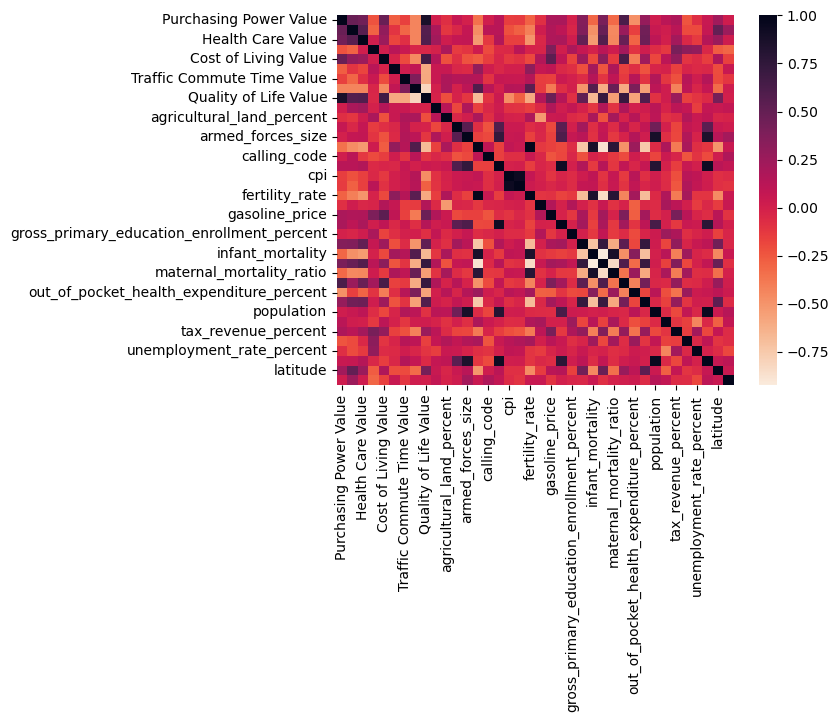

In [42]:
correlations = df.corr(numeric_only = True)
sns.heatmap(correlations, cmap = 'rocket_r')

In [43]:
# Due to the complexity of this analysis, requiring scrutiny of all metrics against one another, I have performed my exploration within a Google Sheet
# and have put the results of my findings below. A summary can also be found in the "Final Notes" section at the end.

**Key Observations (Correlation Review)**

Quality of Life
- There are many metrics that correlated very positively with Quality of Life, including: Purchasing Power, Life Expectancy, Minimum Wage, Cost of Living, Physicians per Thousand, Health Care Value, Safety Value, Tertiary Education Enrollment, and to a lesser degree, GDP.
- There were also many metrics correlating negatively with Quality of Life, including: Consumer Price Index (CPI), Out of Pocket Health Expenditure, Property Price to Income Value, Traffic Commute Time, Maternal/Infant Mortality, Fertility/Birth Rates, and to a major degree, Pollution Value.
- Many of the economic and health metrics make sense. Higher access to affordable products, services, healthcare, education, and housing can lead to higher Life Expectancy and Quality of Life.
- Purchasing Power, Life Expectancy, Minimum Wage, and Pollution Value had the highest correlation, implying that these metrics had the greatest overall impact and are the most important when determining a country’s Quality of Life score.

GDP
- GDP seems to be a crucial piece tying many metrics together. Often times high correlations between two other metrics (such the strong negative correlation between “Cost of Living Value” and “Out of Pocket Healthcare Expenses”) can be attributed to a country being wealthier overall.
- Higher GDP countries tend to produce more CO2 Emissions.
- Larger countries with either more land or more population and urban population levels tended to have higher GDPs.
- Safety, Tertiary Education Enrollment, Health Care Value, Life Expectancy, and overall Quality of Life each correlated slightly positively with GDP, implying that countries that can afford more can provide more. 
- One other thing to note: Purchasing Power is positively correlated with both GDP and Cost of Living, but Cost of Living was not correlated with GDP at all. This led to some interesting observations later when looking at what might be driving higher levels within other metrics. These two metrics (PPP and CoL) did reflect one another otherwise in terms of correlated metrics.

Safety
- It seems Armed Forces Size did not correlate with higher levels of safety. This is probably due to Safety focusing on internal crime and day-to-day life interactions rather than geopolitical relationships, but it is interesting to note nonetheless.

Health
- Very interesting note with Life Expectancy (plus Quality of Life Value) and Maternal/Infant Mortality as well as Fertility/Bith Rates: as Life Expectancy goes down, all four of these other metrics go up (very strong negative correlation). But not only that, every single metric that correlated positively with Life Expectancy correlated negatively with these four metrics to nearly the same degree (and vice versa).
- Another thing to note regarding Maternal/Infant Mortality and Fertility/Birth Rates is the common trend for them to have a strong negative correlation with anything Quality of Life or GDP related. For the former, it makes sense that countries with more resources and better healthcare will have lower levels of birth complications. However, for the latter, one might think that people being able to afford more children would be more likely to have them. Since this is not the case, perhaps it is related to people in higher GDP countries’ being unable to afford the added costs of children due to higher CoL, or lacking time due to their productivity and work commitments? It could maybe even show a shift in political and social values, which would be interesting to delve into at a later time as well.

Pollution & CO2 Emissions
- Pollution Value correlated very negatively with Quality of Life, Life Expectancy, and Health Care Value, but did not correlate at all with GDP.
- CO2 Emissions on the other hand had the opposite effect, correlating with higher levels of Life Expectancy and Health Care Value, and lower Maternal/Infant Mortality Rates. This could be due to higher GDP countries having higher CO2 production while also providing better Healthcare and resources.
- I initially wondered if Pollution Value went up with Maternal/Infant Mortality Rates and Fertility/Birth Rates due to China and India acting as outliers, but it seems that Population has very little impact on a country’s Pollution Value. I then thought it may have to do with lower GDP countries having higher Fertility/Birth Rates, but GDP is uncorrelated with Pollution as well. My best guess is that these two metrics are not caused by one another but is instead being driven by the tendency for countries with higher levels of Pollution to have lower Costs of Living, which as noted earlier may incentivise people to have more children due to having the ability to better support them financially. 

Demographics
- Population and Urban Population were very closely correlated, which makes sense when you think about how many people live in big cities vs smaller rural areas. They each also showed to correlate positively with higher GDP countries.
- Density was less correlated with Population, which is probably due to larger population countries tending to have more land area.
- Higher Density and Urban Population levels correlated positively with Health Care Value, but Population did not.

Opportunity
- Labor Force Participation showed to be slightly correlated with higher levels of Primary Education Enrollment, Purchasing Power, and Cost of Living.
- It also showed to be negatively correlated with Climate Value, Life Expectancy, Total Tax Rate, and unsurprisingly, Unemployment Rates.
- What was interesting to see is that Labor Force Participation tended to be higher in countries with higher Primary Education Enrollment, but lower in countries with higher Tertiary Education Enrollment. My initial thought was that this was due to people in these countries living longer, but life expectancy actually went down as Labor Force Participation went up. So perhaps it’s economic driven change, wherein citizens of countries with higher GDP can afford not to work as much or have one family member stay home. 
- These stats could also imply that having higher Labor Force Participation leads to higher Purchasing Power and drives higher Costs of Living, but transversly, it could imply that countries with higher Purchasing Power (and thus higher GDP) tend to foster greater levels of Employment through economic opportunities.
- One interesting note about Unemployment Rate is that it correlated negatively with Safety Rates. I suspect this means that lower levels of unemployment can lead to lower levels of crime.

Latitude
- Roughly 68% of all land is within the northern hemisphere, which also contains 144 countries and nearly 87% of all earth’s population. (Wikepedia) That said, there are still several interesting facts to note about Latitude.
- Countries further north seem to have more Physicians, higher levels of Safety, Life Expectancy, Tertiary Education Enrollment, and overall Quality of Life.
- There was also a slight correlation between higher latitudes and overall Health Care Value, Purchasing Power, Cost of Living, and GDP.
- These countries also had far lower Maternal/Infant Morality Rates and Fertility/Birth Rates. Interestingly, lower levels of Pollution, Climate Value, Property Price to Income Value, and Labor Force Participation were also relatively tied to higher latitudes.

**Citations:**

Northern Hemisphere (2025) Wikipedia. Available at: https://en.wikipedia.org/wiki/Northern_Hemisphere (Accessed: 05 June 2025).

**Summary**

See below in "Final Notes" section.

## Custom Ranking

- Normalize numeric values (Min-Max scaling or Z-score).
- Create new column for each scored category.
- Compare to Quality of Life Value
- Check Top 10s

### Column Filtering

- Went through columns and decided which were most useful for each category and the overall country score.
- Most of this was done on a whiteboard, but below are the technical steps taken for creating the filtered set.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      236 non-null    object 
 1   abbreviation                                 235 non-null    object 
 2   Purchasing Power Value                       187 non-null    float64
 3   Purchasing Power Category                    187 non-null    object 
 4   Safety Value                                 231 non-null    float64
 5   Safety Category                              231 non-null    object 
 6   Health Care Value                            218 non-null    float64
 7   Health Care Category                         218 non-null    object 
 8   Climate Value                                112 non-null    float64
 9   Climate Category                             112 non-null    object 
 10  Cost of

In [50]:
# Checking 'labor_force_participation_percent' and 'unemployment_rate_percent' for usefulness.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[['labor_force_participation_percent', 'unemployment_rate_percent']].sort_values(by=[ 'unemployment_rate_percent'], ascending=[True]))

,labor_force_participation_percent,unemployment_rate_percent
id,,
171,86.8,0.09
236,72.0,0.47
234,83.8,0.58
116,78.5,0.63
37,82.3,0.68
208,67.3,0.75
176,83.7,1.03
211,59.8,1.12
148,83.8,1.41


In [51]:
# Creating two new lists to include distilled columns.

# Basic country data, columns unweighted.
core_columns = ['country', 'abbreviation', 'capital_major_city', 'official_language', 'currency_code', 'population', 'land_area_km2', 'density_p_km2',
    'urban_population', 'forested_area_percent', 'agricultural_land_percent', 'armed_forces_size', 'Quality of Life Value']

In [52]:
# Data for Categories, columns weighted.
scoring_columns = [
    # Finances (4)
    'Cost of Living Value', 'minimum_wage', 'gdp', 'total_tax_rate_percent',
    # Health (3)
    'Health Care Value', 'life_expectancy', 'out_of_pocket_health_expenditure_percent',
    # Safety (1)
    'Safety Value',
    # Environment (2)
    'Climate Value', 'Pollution Value',
    # Optional groups (3)
    'gross_tertiary_education_enrollment_percent',
    'labor_force_participation_percent', 'unemployment_rate_percent'
]

In [53]:
# Creating new DataFrame
filtered_columns = core_columns + scoring_columns
df_filtered = df[filtered_columns].copy()

In [54]:
# Received KeyError. Will check for missnamed columns and update.
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      236 non-null    object 
 1   abbreviation                                 235 non-null    object 
 2   capital_major_city                           180 non-null    object 
 3   official_language                            176 non-null    object 
 4   currency_code                                180 non-null    object 
 5   population                                   180 non-null    float64
 6   land_area_km2                                180 non-null    float64
 7   density_p_km2                                180 non-null    float64
 8   urban_population                             180 non-null    float64
 9   forested_area_percent                        177 non-null    float64
 10  agricul

In [55]:
# Corrected Names: 'minimum_wage', 'gdp', 'life_expectancy', 'out_of_pocket_health_expenditure_percent', 'gross_tertiary_education_enrollment_percent'.

# Changing Data Types to numeric in 'scoring_columns' now that NULLs are fixed and columns are distilled. 
for col in scoring_columns:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

In [56]:
# Creating subset of 'core_columns' for numeric data. 
core_numeric_columns = ['population', 'land_area_km2', 'density_p_km2', 'urban_population', 'forested_area_percent',
    'agricultural_land_percent', 'armed_forces_size', 'Quality of Life Value']

In [57]:
# Changing Data Types to numeric for 'core_numeric_columns'.
for col in core_numeric_columns:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

In [58]:
# Checking Data Types.
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   country                                      236 non-null    object 
 1   abbreviation                                 235 non-null    object 
 2   capital_major_city                           180 non-null    object 
 3   official_language                            176 non-null    object 
 4   currency_code                                180 non-null    object 
 5   population                                   180 non-null    float64
 6   land_area_km2                                180 non-null    float64
 7   density_p_km2                                180 non-null    float64
 8   urban_population                             180 non-null    float64
 9   forested_area_percent                        177 non-null    float64
 10  agricul

In [59]:
# Reviewing entire DataFrame.
df

,country,abbreviation,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category,density_p_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,cpi,cpi_change_percent,currency_code,fertility_rate,forested_area_percent,gasoline_price,gdp,gross_primary_education_enrollment_percent,gross_tertiary_education_enrollment_percent,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure_percent,physicians_per_thousand,population,labor_force_participation_percent,tax_revenue_percent,total_tax_rate_percent,unemployment_rate_percent,urban_population,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Afghanistan,AF,32.15,Very Low,25.33,Low,24.24,Low,NaN,NaN,21.08,Very Low,7.80,Low,56.17,Very High,84.44,Very High,NaN,NaN,60.0,58.0,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,3.804175e+07,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
2,Aland Islands,AX,125.01,Very High,71.81,High,79.72,High,NaN,NaN,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,AL,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low,105.0,43.0,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2.854191e+06,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
4,Alderney,GG,NaN,NaN,83.79,Very High,100.00,Very High,NaN,NaN,NaN,NaN,NaN,NaN,5.00,Very Low,1.72,Very Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,DZ,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.70,Very High,45.09,High,63.87,High,98.83,Very Low,18.0,17.0,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699880e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,4.305305e+07,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
6,American Samoa,AS,NaN,NaN,54.41,Moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,Very High,78.45,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Andorra,AD,121.14,Very High,84.71,Very High,75.56,High,NaN,NaN,48.09,Low,9.03,Moderate,13.33,Very Low,22.98,Low,NaN,NaN,164.0,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,7.714200e+04,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
8,Angola,AO,224.46,Very High,33.71,Low,36.58,Low,NaN,NaN,42.57,Low,8.01,Moderate,65.43,Very High,92.07,Very High,NaN,NaN,26.0,48.0,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,3.182530e+07,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
9,Anguilla,AI,NaN,NaN,75.44,High,77.08,High,NaN,NaN,NaN,NaN,1.84,Very Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Checking NULL counts for reference.
df_filtered[scoring_columns].isnull().sum().sort_values(ascending=False)

Climate Value                                  124
minimum_wage                                    89
labor_force_participation_percent               67
unemployment_rate_percent                       67
total_tax_rate_percent                          61
gross_tertiary_education_enrollment_percent     60
out_of_pocket_health_expenditure_percent        59
life_expectancy                                 57
gdp                                             56
Cost of Living Value                            48
Health Care Value                               18
Pollution Value                                 14
Safety Value                                     5
dtype: int64

**Note**
- Choosing to keep NULLs unchanged. 
- Purpose of analysis is to help people decide where to move. Do not wish to drop countries or misslead with false or placeholder data.

In [62]:
# Checking 'Quality of Life Value' for reference.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_filtered[['country', 'Quality of Life Value']].sort_values(by=['Quality of Life Value'], ascending=[False]))

,country,Quality of Life Value
id,,
124,Luxembourg,224.31
159,Oman,213.42
149,Netherlands,211.85
56,Denmark,208.65
203,Switzerland,204.91
71,Finland,203.06
96,Iceland,202.04
158,Norway,194.48
202,Sweden,193.48


### Data Normalization

In [64]:
# Testing Min-Max Scaler.
df_filtered['normalized_gdp'] = scaler.fit_transform(
    df_filtered[['gdp']].values.reshape(-1, 1)
)

In [65]:
# Check for Success.
df_filtered[['country','gdp','normalized_gdp']].sort_values(by='gdp', ascending=True)

,country,gdp,normalized_gdp
id,,,
112,Kiribati,1.946472e+08,0.000000
132,Marshall Islands,2.212780e+08,0.000001
161,Palau,2.839949e+08,0.000004
137,Micronesia,4.019323e+08,0.000010
211,Tonga,4.503533e+08,0.000012
58,Dominica,5.960333e+08,0.000019
180,Saint Vincent And The Grenadines,8.253852e+08,0.000029
182,Samoa,8.506550e+08,0.000031
225,Vanuatu,9.170589e+08,0.000034


In [66]:
df_filtered.drop('normalized_gdp', axis = 1)

,country,abbreviation,capital_major_city,official_language,currency_code,population,land_area_km2,density_p_km2,urban_population,forested_area_percent,agricultural_land_percent,armed_forces_size,Quality of Life Value,Cost of Living Value,minimum_wage,gdp,total_tax_rate_percent,Health Care Value,life_expectancy,out_of_pocket_health_expenditure_percent,Safety Value,Climate Value,Pollution Value,gross_tertiary_education_enrollment_percent,labor_force_participation_percent,unemployment_rate_percent
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Afghanistan,AF,Kabul,Pashto,AFN,3.804175e+07,652230.0,60.0,9797273.0,2.1,58.0,323000.0,NaN,21.08,0.43,1.910135e+10,71.4,24.24,64.5,78.4,25.33,NaN,84.44,9.7,48.9,11.12
2,Aland Islands,AX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,NaN,NaN,79.72,NaN,NaN,71.81,NaN,18.05,NaN,NaN,NaN
3,Albania,AL,Tirana,Albanian,ALL,2.854191e+06,28748.0,105.0,1747593.0,28.1,43.0,9000.0,104.16,40.85,1.12,1.527808e+10,36.6,48.21,78.5,56.9,55.52,86.43,77.25,55.0,55.7,12.33
4,Alderney,GG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,83.79,NaN,1.72,NaN,NaN,NaN
5,Algeria,DZ,Algiers,Arabic,DZD,4.305305e+07,2381741.0,18.0,31510100.0,0.8,17.0,317000.0,98.83,25.31,0.95,1.699880e+11,66.1,54.43,76.7,28.1,47.54,94.82,63.87,51.4,41.2,11.70
6,American Samoa,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.41,NaN,78.45,NaN,NaN,NaN
7,Andorra,AD,Andorra la Vella,Catalan,EUR,7.714200e+04,468.0,164.0,67873.0,34.0,40.0,NaN,NaN,48.09,6.63,3.154058e+09,NaN,75.56,NaN,36.4,84.71,NaN,22.98,NaN,NaN,NaN
8,Angola,AO,Luanda,Portuguese,AOA,3.182530e+07,1246700.0,26.0,21061025.0,46.3,48.0,117000.0,NaN,42.57,0.71,9.463542e+10,49.1,36.58,60.8,33.4,33.71,NaN,92.07,9.3,77.5,6.89
9,Anguilla,AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.08,NaN,NaN,75.44,NaN,NaN,NaN,NaN,NaN


In [67]:
# Create "For" Loop to run Scaler on all columns and create new Normalized columns.
for col in scoring_columns:
    norm_col = f'norm_{col}'
    values = df_filtered[[col]].values.reshape(-1, 1)
    scaled_values = scaler.fit_transform(values)
    df_filtered[norm_col] = scaled_values

In [68]:
# Create 'norm_Quality of Life Value' column for future reference.
norm_col = f'norm_{'Quality of Life Value'}'
values = df_filtered[['Quality of Life Value']].values.reshape(-1, 1)
scaled_values = scaler.fit_transform(values)
df_filtered[norm_col] = scaled_values

In [69]:
# Check for New Columns and NULLs
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   country                                           236 non-null    object 
 1   abbreviation                                      235 non-null    object 
 2   capital_major_city                                180 non-null    object 
 3   official_language                                 176 non-null    object 
 4   currency_code                                     180 non-null    object 
 5   population                                        180 non-null    float64
 6   land_area_km2                                     180 non-null    float64
 7   density_p_km2                                     180 non-null    float64
 8   urban_population                                  180 non-null    float64
 9   forested_area_percent     

In [70]:
# Check New Columns for accuracy.
df_filtered[[f'norm_{col}' for col in scoring_columns]].describe()

,norm_Cost of Living Value,norm_minimum_wage,norm_gdp,norm_total_tax_rate_percent,norm_Health Care Value,norm_life_expectancy,norm_out_of_pocket_health_expenditure_percent,norm_Safety Value,norm_Climate Value,norm_Pollution Value,norm_gross_tertiary_education_enrollment_percent,norm_labor_force_participation_percent,norm_unemployment_rate_percent
count,188.000000,147.000000,180.000000,175.000000,218.000000,179.000000,177.000000,231.000000,112.000000,222.000000,176.000000,169.000000,169.000000
mean,0.231920,0.155466,0.023674,0.157659,0.492806,0.593070,0.401630,0.476535,0.729982,0.522382,0.272631,0.504474,0.242787
std,0.162269,0.212200,0.104838,0.098176,0.187738,0.227570,0.233146,0.192148,0.199618,0.223191,0.217202,0.217392,0.181744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.116284,0.028719,0.000503,0.107514,0.366838,0.429448,0.216216,0.338961,0.602893,0.347309,0.081186,0.366803,0.117124
50%,0.195572,0.075847,0.001811,0.139887,0.487359,0.625767,0.377150,0.465105,0.757876,0.558424,0.207290,0.497951,0.187611
75%,0.314765,0.170839,0.011186,0.191871,0.614629,0.750000,0.540541,0.622043,0.894659,0.694785,0.459867,0.631148,0.333927
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# Inverting Scores for Lower = Better columns.
df_filtered['norm_Cost of Living Value'] = 1 - df_filtered['norm_Cost of Living Value']
df_filtered['norm_total_tax_rate_percent'] = 1 - df_filtered['norm_total_tax_rate_percent']
df_filtered['norm_out_of_pocket_health_expenditure_percent'] = 1 - df_filtered['norm_out_of_pocket_health_expenditure_percent']
df_filtered['norm_Pollution Value'] = 1 - df_filtered['norm_Pollution Value']
df_filtered['norm_unemployment_rate_percent'] = 1 - df_filtered['norm_unemployment_rate_percent']

### Category Columns

Create New Columns: "overall_score", "score_category" x6

Category Weights:
- Finances (25%)
- Health (20%)
- Safety (20%)
- Environment (15%)
- Education (10%)
- Opportunity (10%)

Create "Top 10" Lists for each category_score and overall_score.

In [74]:
# Creating new category columns:
finance_cols = ['norm_Cost of Living Value', 'norm_gdp', 'norm_minimum_wage', 'norm_total_tax_rate_percent']
df_filtered['score_finance'] = df_filtered[finance_cols].sum(axis=1) / df_filtered[finance_cols].count(axis=1)

health_cols = ['norm_Health Care Value', 'norm_life_expectancy', 'norm_out_of_pocket_health_expenditure_percent']
df_filtered['score_health'] = df_filtered[health_cols].sum(axis=1) / df_filtered[health_cols].count(axis=1)

df_filtered['score_safety'] = df_filtered[['norm_Safety Value']]

environment_cols = ['norm_Climate Value', 'norm_Pollution Value']
df_filtered['score_environment'] = df_filtered[environment_cols].sum(axis=1) / df_filtered[environment_cols].count(axis=1)

df_filtered['score_education'] = df_filtered[['norm_gross_tertiary_education_enrollment_percent']]

opportunity_cols = ['norm_labor_force_participation_percent', 'norm_unemployment_rate_percent']
df_filtered['score_opportunity'] = df_filtered[opportunity_cols].sum(axis=1) / df_filtered[opportunity_cols].count(axis=1)

In [75]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   country                                           236 non-null    object 
 1   abbreviation                                      235 non-null    object 
 2   capital_major_city                                180 non-null    object 
 3   official_language                                 176 non-null    object 
 4   currency_code                                     180 non-null    object 
 5   population                                        180 non-null    float64
 6   land_area_km2                                     180 non-null    float64
 7   density_p_km2                                     180 non-null    float64
 8   urban_population                                  180 non-null    float64
 9   forested_area_percent     

In [76]:
df_filtered[['country','score_finance', 'score_health', 'score_safety', 'score_environment', 'score_education', 'score_opportunity']]

,country,score_finance,score_health,score_safety,score_environment,score_education,score_opportunity
id,,,,,,,
1,Afghanistan,0.426393,0.156136,0.112234,0.213539,0.065538,0.415347
2,Aland Islands,0.702519,0.751105,0.664844,0.844742,NaN,NaN
3,Albania,0.438796,0.485389,0.471169,0.556475,0.399116,0.463481
4,Alderney,NaN,1.000000,0.807276,1.000000,NaN,NaN
5,Algeria,0.435136,0.610366,0.376293,0.672735,0.372607,0.326130
6,American Samoa,NaN,NaN,0.457972,0.270489,NaN,NaN
7,Andorra,0.411640,0.627666,0.818214,0.797870,NaN,NaN
8,Angola,0.413806,0.353062,0.211865,0.140996,0.062592,0.783674
9,Anguilla,NaN,0.718704,0.708001,NaN,NaN,NaN


### Overall Score Column (Custom Quality of Life Score)

In [78]:
# Create overall_score column using weighted category values.
df_filtered['overall_score'] = (
    df_filtered['score_finance']     * 0.25 +
    df_filtered['score_health']      * 0.20 +
    df_filtered['score_safety']      * 0.20 +
    df_filtered['score_environment'] * 0.15 +
    df_filtered['score_opportunity'] * 0.10 +
    df_filtered['score_education']   * 0.10
)

In [79]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 48 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   country                                           236 non-null    object 
 1   abbreviation                                      235 non-null    object 
 2   capital_major_city                                180 non-null    object 
 3   official_language                                 176 non-null    object 
 4   currency_code                                     180 non-null    object 
 5   population                                        180 non-null    float64
 6   land_area_km2                                     180 non-null    float64
 7   density_p_km2                                     180 non-null    float64
 8   urban_population                                  180 non-null    float64
 9   forested_area_percent     

### Handling Countries with Nulls & Partial Data

In [81]:
# Create overall_score_partial_data column that includes NULLs and missing categories.
# Define Weights.
weights = {
    'score_finance': 0.25,
    'score_health': 0.20,
    'score_safety': 0.20,
    'score_environment': 0.15,
    'score_opportunity': 0.10,
    'score_education': 0.10
}

# Multiply each Score by Weight.
for col, weight in weights.items():
    df_filtered[f'weighted_{col}'] = df_filtered[col] * weight

# Sum of Weighted Scores (ignores NULLS).
df_filtered['weighted_sum'] = df_filtered[[f'weighted_{col}' for col in weights]].sum(axis=1)

# Sum of Weights per Row (only includes non-NULL Weights).
df_filtered['weight_total'] = df_filtered[[col for col in weights]].notnull().multiply(list(weights.values())).sum(axis=1)

# Final partial_data Score.
df_filtered['overall_score_partial_data'] = df_filtered['weighted_sum'] / df_filtered['weight_total']

In [82]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 1 to 235
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   country                                           236 non-null    object 
 1   abbreviation                                      235 non-null    object 
 2   capital_major_city                                180 non-null    object 
 3   official_language                                 176 non-null    object 
 4   currency_code                                     180 non-null    object 
 5   population                                        180 non-null    float64
 6   land_area_km2                                     180 non-null    float64
 7   density_p_km2                                     180 non-null    float64
 8   urban_population                                  180 non-null    float64
 9   forested_area_percent     

In [83]:
# Exploring missing 'overall_score_partial_data' entry.
df_filtered[df_filtered['overall_score_partial_data'].isnull()][[
    'country', 'weight_total', 'weighted_sum'
]]

,country,weight_total,weighted_sum
id,,,
229,Wallis And Futuna,0.0,0.0


In [84]:
# Checking 'Wallis And Futuna'.
df_filtered[(df_filtered['country'] == 'Wallis And Futuna')]

,country,abbreviation,capital_major_city,official_language,currency_code,population,land_area_km2,density_p_km2,urban_population,forested_area_percent,agricultural_land_percent,armed_forces_size,Quality of Life Value,Cost of Living Value,minimum_wage,gdp,total_tax_rate_percent,Health Care Value,life_expectancy,out_of_pocket_health_expenditure_percent,Safety Value,Climate Value,Pollution Value,gross_tertiary_education_enrollment_percent,labor_force_participation_percent,unemployment_rate_percent,normalized_gdp,norm_Cost of Living Value,norm_minimum_wage,norm_gdp,norm_total_tax_rate_percent,norm_Health Care Value,norm_life_expectancy,norm_out_of_pocket_health_expenditure_percent,norm_Safety Value,norm_Climate Value,norm_Pollution Value,norm_gross_tertiary_education_enrollment_percent,norm_labor_force_participation_percent,norm_unemployment_rate_percent,norm_Quality of Life Value,score_finance,score_health,score_safety,score_environment,score_education,score_opportunity,overall_score,weighted_score_finance,weighted_score_health,weighted_score_safety,weighted_score_environment,weighted_score_opportunity,weighted_score_education,weighted_sum,weight_total,overall_score_partial_data
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
229,Wallis And Futuna,WF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [85]:
df[(df['country'] == 'Wallis And Futuna') & df.notnull().all(axis=1)]

,country,abbreviation,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category,density_p_km2,agricultural_land_percent,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,cpi,cpi_change_percent,currency_code,fertility_rate,forested_area_percent,gasoline_price,gdp,gross_primary_education_enrollment_percent,gross_tertiary_education_enrollment_percent,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure_percent,physicians_per_thousand,population,labor_force_participation_percent,tax_revenue_percent,total_tax_rate_percent,unemployment_rate_percent,urban_population,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [86]:
# Completely NULL across the board. Will drop 'Wallis And Futuna' entry for now.
df_filtered = df_filtered[df_filtered['country'] != 'Wallis And Futuna']

In [87]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 235
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   country                                           235 non-null    object 
 1   abbreviation                                      234 non-null    object 
 2   capital_major_city                                180 non-null    object 
 3   official_language                                 176 non-null    object 
 4   currency_code                                     180 non-null    object 
 5   population                                        180 non-null    float64
 6   land_area_km2                                     180 non-null    float64
 7   density_p_km2                                     180 non-null    float64
 8   urban_population                                  180 non-null    float64
 9   forested_area_percent     

### Comparing Custom Score to Normalized 'Quality of Life Value'

In [89]:
# Looking at Top 10 lists and comparing to 'norm_Quality of Life Value'.
df_filtered[['country', 'overall_score', 'norm_Quality of Life Value']].sort_values(by='overall_score', ascending=False).head(10)

,country,overall_score,norm_Quality of Life Value
id,,,
149,Netherlands,0.702090,0.939760
107,Japan,0.686505,0.806662
14,Australia,0.677917,0.837459
56,Denmark,0.671312,0.924289
193,Slovenia,0.657461,0.780652
151,New Zealand,0.655360,0.817540
15,Austria,0.652012,0.844131
96,Iceland,0.651838,0.892332
71,Finland,0.650738,0.897264


In [90]:
# Top 10 by 'norm_Quality of Life Value' for reference.
df_filtered[['country', 'overall_score', 'norm_Quality of Life Value']].sort_values(by='norm_Quality of Life Value', ascending=False).head(10)

,country,overall_score,norm_Quality of Life Value
id,,,
124,Luxembourg,0.632447,1.000000
159,Oman,0.639429,0.947351
149,Netherlands,0.702090,0.939760
56,Denmark,0.671312,0.924289
203,Switzerland,0.622240,0.906208
71,Finland,0.650738,0.897264
96,Iceland,0.651838,0.892332
158,Norway,0.643803,0.855782
202,Sweden,0.599211,0.850948


In [91]:
# Calculate the Average Absolute Difference between 'Overall_Score' and 'norm_Quality of Life Value'.
score_comparison = df_filtered[['overall_score', 'norm_Quality of Life Value']].dropna()
score_comparison['difference'] = abs(score_comparison['overall_score'] - score_comparison['norm_Quality of Life Value'])
average_difference = score_comparison['difference'].mean()
print("Average Difference:", average_difference)

Average Difference: 0.11729302965743486


In [92]:
# Checking correlation between 'Overall_Score' and 'norm_Quality of Life Value'.
correlation = df_filtered['overall_score'].corr(df_filtered['norm_Quality of Life Value'])
print('Correlation:', correlation)

Correlation: 0.8515996499159618


**Note**
- On average, the scores have a strong correlation of 0.85 with one another, and each country's 'Overall_Score' should be roughly 0.117 points below their 'norm_Quality of Life Value'. 

In [94]:
# Top 10 by 'overall_score_partial_data' for reference.
df_filtered[['country', 'overall_score_partial_data', 'norm_Quality of Life Value']].sort_values(by='overall_score_partial_data', ascending=False).head(10)

,country,overall_score_partial_data,norm_Quality of Life Value
id,,,
4,Alderney,0.929919,NaN
142,Montserrat,0.921294,NaN
217,Tuvalu,0.890144,NaN
177,Saint Helena,0.796055,NaN
181,Saint-Pierre And Miquelon,0.782210,NaN
69,Faroe Islands,0.764852,NaN
205,Taiwan,0.763347,0.689954
48,Cook Islands,0.761820,NaN
74,French Polynesia,0.761718,NaN


In [95]:
# Note: Countries with only a 'overall_score_partial_data' seem to have inflated scores. Will apply penalty for balance.

### Balancing 'overall_score_partial_data'

In [97]:
# Creating 15% Penalty per category missing for 'overall_score_partial_data'.
total_categories = 6

df_filtered['valid_categories'] = df_filtered[[
    'score_finance', 'score_health', 'score_safety',
    'score_environment', 'score_opportunity', 'score_education'
]].notnull().sum(axis=1)

missing_categories = total_categories - df_filtered['valid_categories']
penalty_factor = 1 - (missing_categories * 0.12)

df_filtered['overall_score_partial_data_adjusted'] = df_filtered['overall_score_partial_data'] * penalty_factor

In [98]:
df_filtered[['country', 'overall_score_partial_data_adjusted', 'norm_Quality of Life Value']].sort_values(by='overall_score_partial_data_adjusted', ascending=False).head(10)

,country,overall_score_partial_data_adjusted,norm_Quality of Life Value
id,,,
149,Netherlands,0.702090,0.939760
107,Japan,0.686505,0.806662
14,Australia,0.677917,0.837459
56,Denmark,0.671312,0.924289
193,Slovenia,0.657461,0.780652
151,New Zealand,0.655360,0.817540
15,Austria,0.652012,0.844131
96,Iceland,0.651838,0.892332
71,Finland,0.650738,0.897264


In [99]:
# Checking Taiwan, the only country ranked Top 10 for 'overall_score_partial_data' that had a non-NULL 'norm_Quality of Life Value'.
df_filtered[(df_filtered['country'] == 'Taiwan')][['country', 'overall_score_partial_data_adjusted', 'norm_Quality of Life Value']]

,country,overall_score_partial_data_adjusted,norm_Quality of Life Value
id,,,
205,Taiwan,0.580144,0.689954


**Note**
- Looks far better, more accurately reflecting the Average Absolute Difference between 'Overall_Score' and 'norm_Quality of Life Value' seen in most countries.

### Comparing 'overall_score_partial_data_adjusted' to 'norm_Quality of Life Value'

In [102]:
# Calculate the Average Absolute Difference between 'overall_score_partial_data_adjusted' and 'norm_Quality of Life Value'.
score_comparison = df_filtered[['overall_score_partial_data_adjusted', 'norm_Quality of Life Value']].dropna()
score_comparison['difference'] = abs(score_comparison['overall_score_partial_data_adjusted'] - score_comparison['norm_Quality of Life Value'])
average_difference = score_comparison['difference'].mean()
print("Average Difference:", average_difference)

Average Difference: 0.11786115413652784


In [103]:
# Checking correlation between 'Overall_Score_Partial_Data_Adjusted' and 'norm_Quality of Life Value'.
correlation = df_filtered['overall_score_partial_data_adjusted'].corr(df_filtered['norm_Quality of Life Value'])
print('Correlation:', correlation)

Correlation: 0.8230335110382787


In [104]:
# Exporting to CSV for Tableau.
# df_filtered.to_csv('Country_Analysis_Mastersheet_Final.csv', index=False, encoding='utf-8', header=True)

**Observations**
- The 'overall_score_partial_data_adjusted' score has a correlation of 0.82 with 'norm_Quality of Life Value', only 0.03 less than our original correlation with 'Overall_Score'. 
- The average absolute difference is almost exactly the same, with 'overall_score_partial_data_adjusted' being 0.118 less on average instead of 0.117. Both values look relatively balanced now.

### Top 10 Lists

In [107]:
# Finance
df_filtered[['country', 'score_finance',]].sort_values(by='score_finance', ascending=False).head(10)

,country,score_finance
id,,
19,Bangladesh,0.976061
66,Eswatini,0.947100
113,Kosovo (Disputed Territory),0.931866
156,North Macedonia,0.893948
162,Palestine,0.829330
205,Taiwan,0.774923
129,Maldives,0.766050
221,United States,0.749490
18,Bahrain,0.741441


In [108]:
# Health
df_filtered[['country', 'score_health',]].sort_values(by='score_health', ascending=False).head(10)

,country,score_health
id,,
4,Alderney,1.000000
226,Vatican City,1.000000
217,Tuvalu,1.000000
74,French Polynesia,0.954590
85,Guadeloupe,0.914826
183,San Marino,0.857684
72,France,0.852419
107,Japan,0.852308
205,Taiwan,0.834315


In [109]:
# Safety
df_filtered[['country', 'score_safety',]].sort_values(by='score_safety', ascending=False).head(10)

,country,score_safety
id,,
181,Saint-Pierre And Miquelon,1.000000
142,Montserrat,0.921294
177,Saint Helena,0.912614
122,Liechtenstein,0.855427
7,Andorra,0.818214
219,United Arab Emirates,0.814885
171,Qatar,0.810367
4,Alderney,0.807276
69,Faroe Islands,0.804661


In [110]:
# Environment
df_filtered[['country', 'score_environment',]].sort_values(by='score_environment', ascending=False).head(10)

,country,score_environment
id,,
4,Alderney,1.000000
68,Falkland Islands,0.983552
69,Faroe Islands,0.969671
122,Liechtenstein,0.954839
48,Cook Islands,0.934398
88,Guernsey,0.907112
161,Palau,0.879730
25,Bermuda,0.874216
223,Us Virgin Islands,0.871173


In [111]:
# Education
df_filtered[['country', 'score_education',]].sort_values(by='score_education', ascending=False).head(10)

,country,score_education
id,,
82,Greece,1.000000
14,Australia,0.826951
84,Grenada,0.764359
196,South Korea,0.688513
11,Argentina,0.656848
198,Spain,0.648748
44,Chile,0.645803
221,United States,0.643594
71,Finland,0.643594


In [112]:
# Opportunity
df_filtered[['country', 'score_opportunity',]].sort_values(by='score_opportunity', ascending=False).head(10)

,country,score_opportunity
id,,
171,Qatar,1.000000
126,Madagascar,0.963102
234,Solomon Islands,0.960540
176,Rwanda,0.951506
148,Nepal,0.945766
37,Cambodia,0.943391
207,Tanzania,0.931522
219,United Arab Emirates,0.911616
116,Laos,0.905347


## Visuals

- QoL Score Comparison Line Graph.
- Export CSV for Tableau.
- Top 10 Bar Graph.
- Categorical Top 10 Graphs.

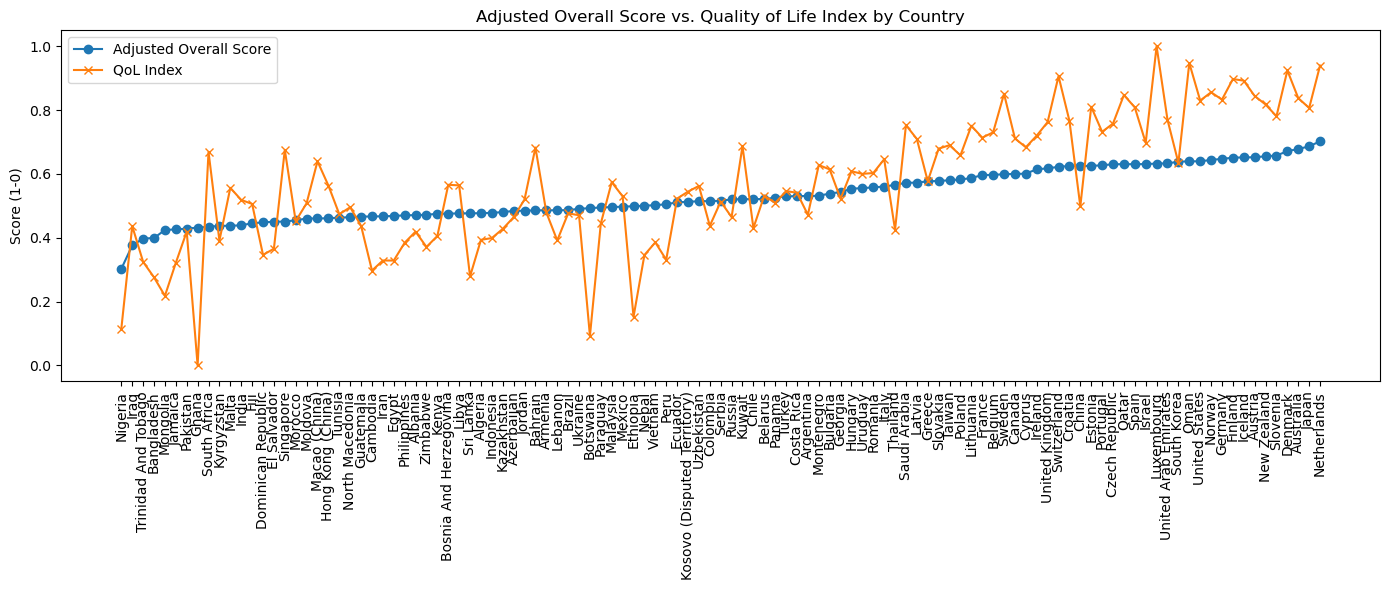

In [115]:
# Adjusted Overall Score vs Quality of Life Index Line Graph.
# Sorted by 'overall_score_partial_data_adjusted'

comparison_df = df_filtered[['country', 'overall_score_partial_data_adjusted', 'norm_Quality of Life Value']].dropna()

comparison_df = comparison_df.sort_values(by='overall_score_partial_data_adjusted', ascending=True)

plt.figure(figsize=(14, 6))

plt.plot(comparison_df['country'], comparison_df['overall_score_partial_data_adjusted'], label='Adjusted Overall Score', marker='o')
plt.plot(comparison_df['country'], comparison_df['norm_Quality of Life Value'], label='QoL Index', marker='x')

plt.xticks(rotation=90)
plt.ylabel('Score (1-0)')
plt.title('Adjusted Overall Score vs. Quality of Life Index by Country')
plt.legend()
plt.tight_layout()
plt.savefig('comparison1.png')
plt.show()

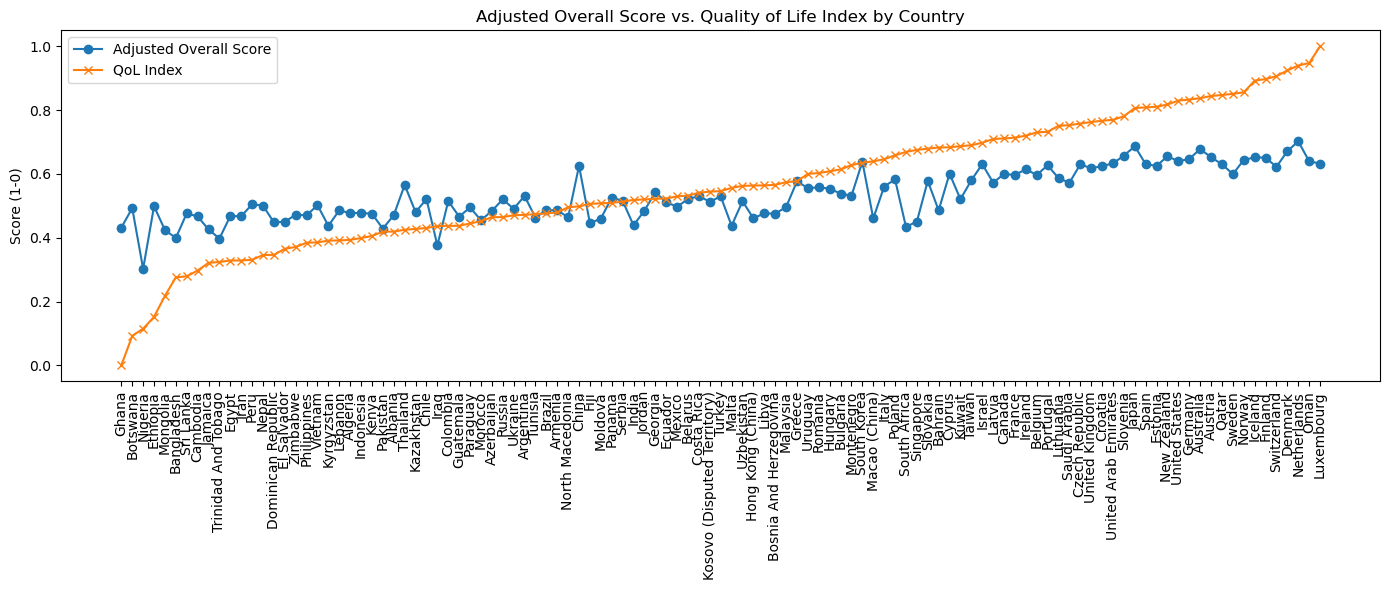

In [116]:
# Sorted by 'norm_Quality of Life Value'

comparison_df = df_filtered[['country', 'overall_score_partial_data_adjusted', 'norm_Quality of Life Value']].dropna()

comparison_df = comparison_df.sort_values(by='norm_Quality of Life Value', ascending=True)

plt.figure(figsize=(14, 6))

plt.plot(comparison_df['country'], comparison_df['overall_score_partial_data_adjusted'], label='Adjusted Overall Score', marker='o')
plt.plot(comparison_df['country'], comparison_df['norm_Quality of Life Value'], label='QoL Index', marker='x')

plt.xticks(rotation=90)
plt.ylabel('Score (1-0)')
plt.title('Adjusted Overall Score vs. Quality of Life Index by Country')
plt.legend()
plt.tight_layout()
plt.savefig('comparison2.png')
plt.show()

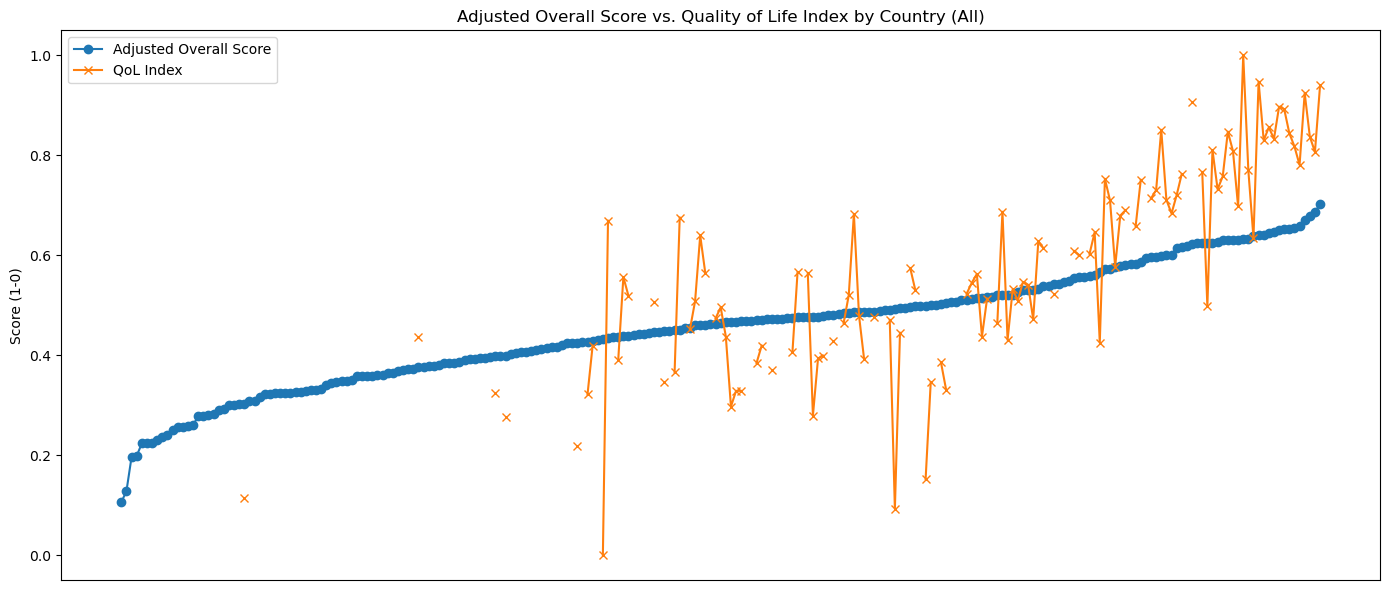

In [117]:
# Comparison Line Graph with all countries.
# Sorted by 'overall_score_partial_data_adjusted'

comparison_df = df_filtered[['country', 'overall_score_partial_data_adjusted', 'norm_Quality of Life Value']]

comparison_df = comparison_df.sort_values(by='overall_score_partial_data_adjusted', ascending=True)

plt.figure(figsize=(14, 6))

plt.plot(comparison_df['country'], comparison_df['overall_score_partial_data_adjusted'], label='Adjusted Overall Score', marker='o')
plt.plot(comparison_df['country'], comparison_df['norm_Quality of Life Value'], label='QoL Index', marker='x')

# Note: Removing country names as they are smushed and unreadable.
plt.xticks([])
plt.ylabel('Score (1-0)')
plt.title('Adjusted Overall Score vs. Quality of Life Index by Country (All)')
plt.legend()
plt.tight_layout()
plt.savefig('comparison_all.png')
plt.show()

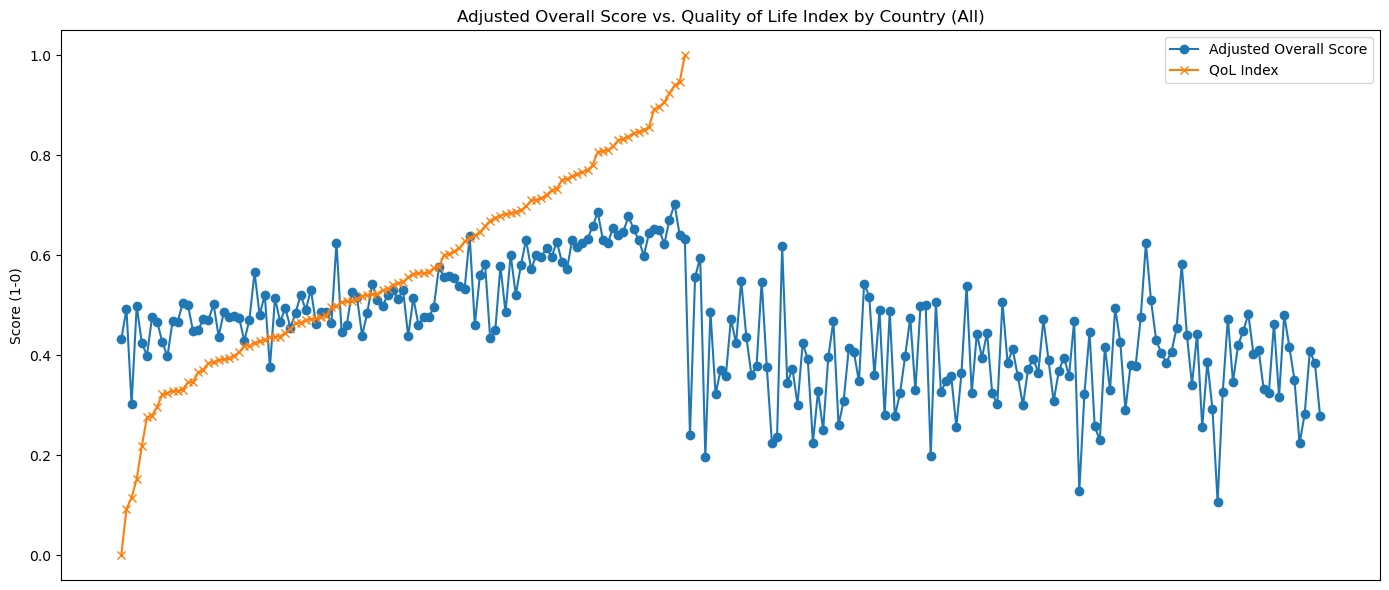

In [118]:
# Sorted by 'norm_Quality of Life Value'

comparison_df = df_filtered[['country', 'overall_score_partial_data_adjusted', 'norm_Quality of Life Value']]

comparison_df = comparison_df.sort_values(by='norm_Quality of Life Value', ascending=True)

plt.figure(figsize=(14, 6))

plt.plot(comparison_df['country'], comparison_df['overall_score_partial_data_adjusted'], label='Adjusted Overall Score', marker='o')
plt.plot(comparison_df['country'], comparison_df['norm_Quality of Life Value'], label='QoL Index', marker='x')

plt.xticks([])
plt.ylabel('Score (1-0)')
plt.title('Adjusted Overall Score vs. Quality of Life Index by Country (All)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\leost\AppData\Local\Temp\ipykernel_38424\1637061158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10, y = 'country', x = 'overall_score_partial_data_adjusted', palette = 'flare')


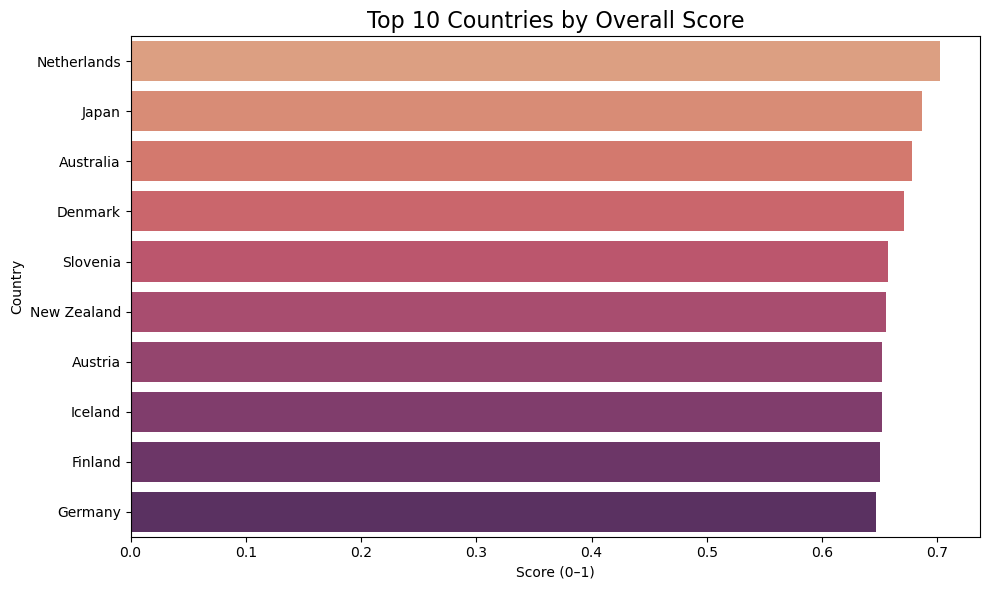

In [231]:
# Top 10 Bar Graph.
top10 = df_filtered[['country', 'overall_score_partial_data_adjusted']].dropna().sort_values(by='overall_score_partial_data_adjusted', ascending=False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(data = top10, y = 'country', x = 'overall_score_partial_data_adjusted', palette = 'flare')
plt.title('Top 10 Countries by Overall Score', fontsize = 16)
plt.xlabel('Score (0–1)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10.png')
plt.show()

C:\Users\leost\AppData\Local\Temp\ipykernel_38424\314285542.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10_finance, x = 'score_finance', y = 'country', palette = 'viridis_r')


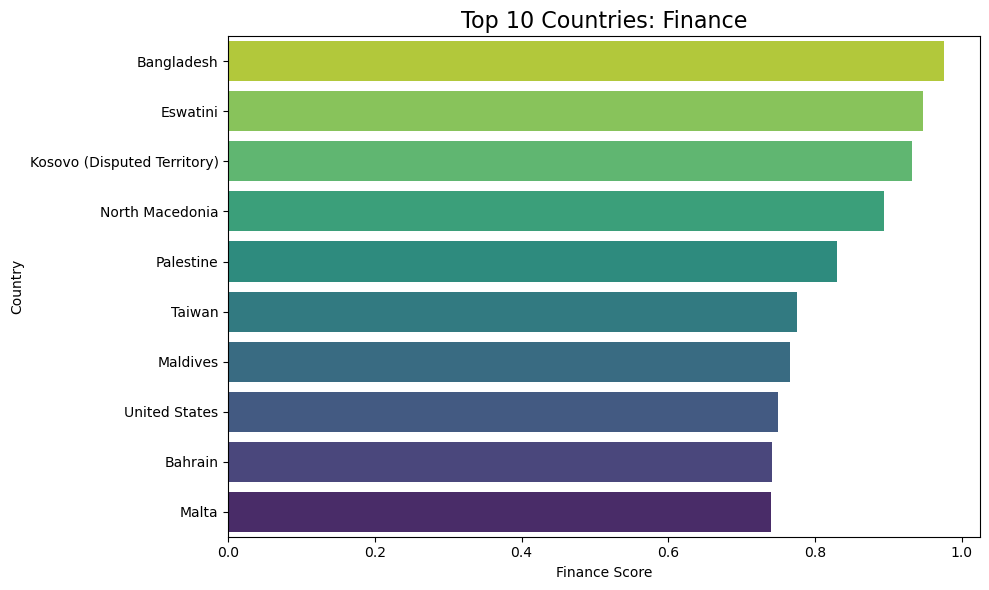

In [233]:
# Top 10s by Category.
top10_finance = df_filtered[['country', 'score_finance']].sort_values(by = 'score_finance', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(data = top10_finance, x = 'score_finance', y = 'country', palette = 'viridis_r')
plt.title('Top 10 Countries: Finance', fontsize = 16)
plt.xlabel('Finance Score')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10finance.png')
plt.show()

C:\Users\leost\AppData\Local\Temp\ipykernel_38424\453420121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10_health, x = 'score_health', y = 'country', palette = 'viridis_r')


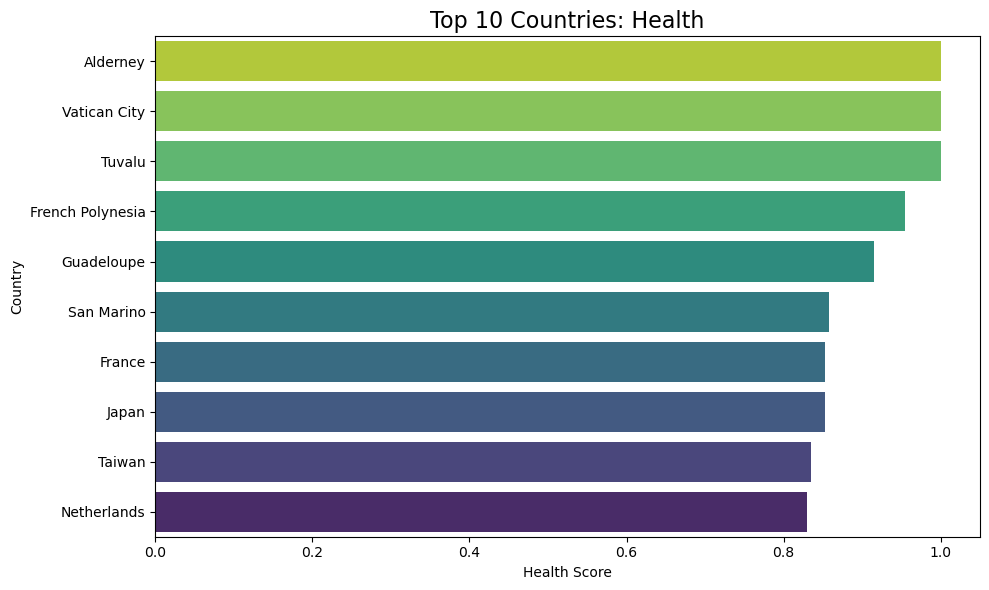

In [235]:
top10_health = df_filtered[['country', 'score_health']].sort_values(by = 'score_health', ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(data = top10_health, x = 'score_health', y = 'country', palette = 'viridis_r')
plt.title('Top 10 Countries: Health', fontsize = 16)
plt.xlabel('Health Score')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10health.png')
plt.show()

C:\Users\leost\AppData\Local\Temp\ipykernel_38424\1801878425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10_safety, x = 'score_safety', y = 'country', palette = 'viridis_r')


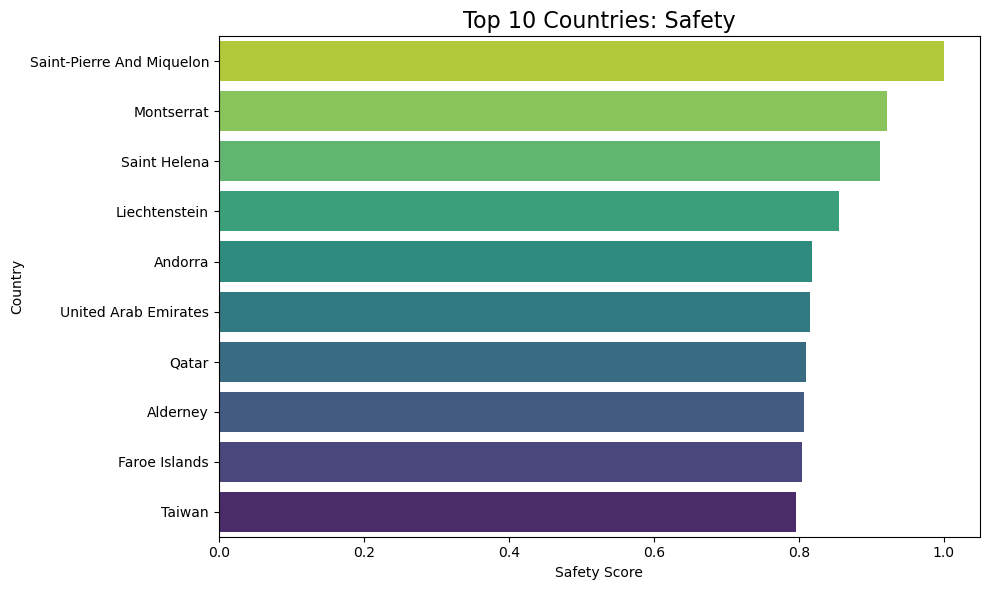

In [237]:
top10_safety = df_filtered[['country', 'score_safety']].sort_values(by = 'score_safety', ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(data = top10_safety, x = 'score_safety', y = 'country', palette = 'viridis_r')
plt.title('Top 10 Countries: Safety', fontsize = 16)
plt.xlabel('Safety Score')
plt.ylabel('Country')
plt.savefig('top10safety.png')
plt.tight_layout()
plt.show()

C:\Users\leost\AppData\Local\Temp\ipykernel_38424\3538594988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10_environment, x = 'score_environment', y = 'country', palette = 'viridis_r')


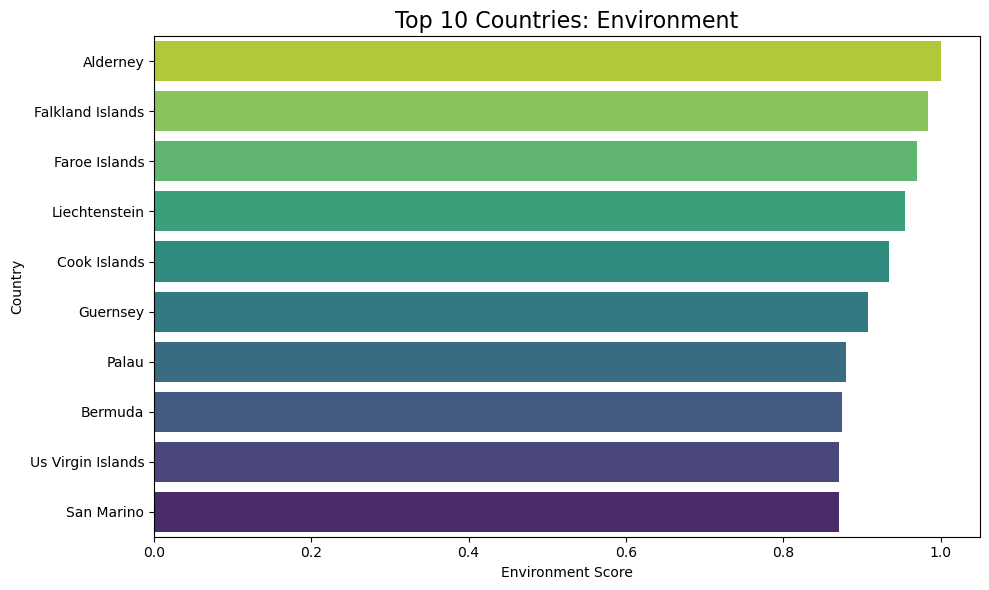

In [239]:
top10_environment = df_filtered[['country', 'score_environment']].sort_values(by = 'score_environment', ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(data = top10_environment, x = 'score_environment', y = 'country', palette = 'viridis_r')
plt.title('Top 10 Countries: Environment', fontsize = 16)
plt.xlabel('Environment Score')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10environment.png')
plt.show()

C:\Users\leost\AppData\Local\Temp\ipykernel_38424\1060012638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10_education, x = 'score_education', y = 'country', palette = 'viridis_r')


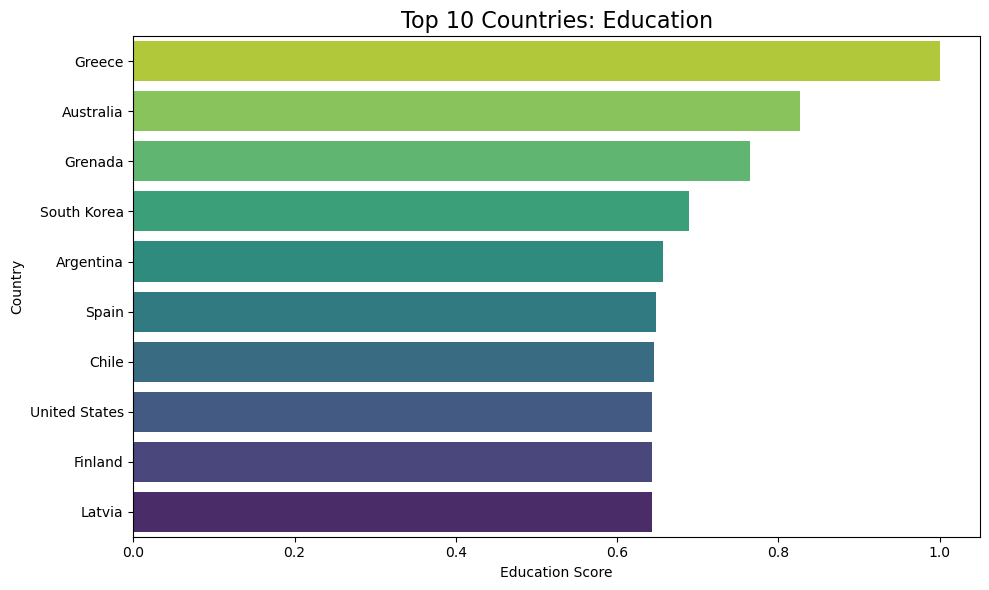

In [241]:
top10_education = df_filtered[['country', 'score_education']].sort_values(by = 'score_education', ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(data = top10_education, x = 'score_education', y = 'country', palette = 'viridis_r')
plt.title('Top 10 Countries: Education', fontsize = 16)
plt.xlabel('Education Score')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10education.png')
plt.show()

C:\Users\leost\AppData\Local\Temp\ipykernel_38424\3013428469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10_opportunity, x = 'score_opportunity', y = 'country', palette = 'viridis_r')


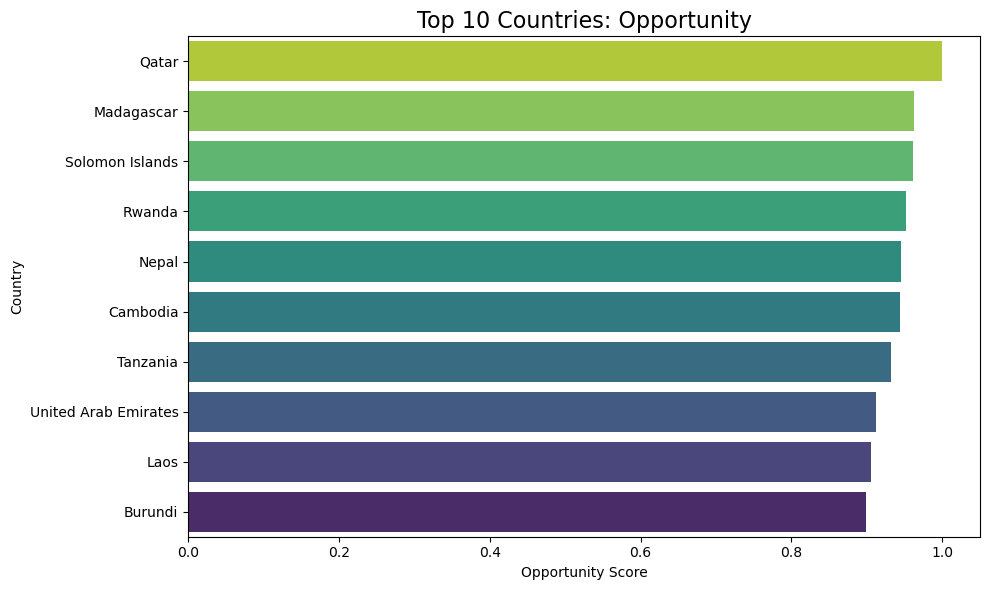

In [243]:
top10_opportunity = df_filtered[['country', 'score_opportunity']].sort_values(by = 'score_opportunity', ascending = False).head(10)

# Plot
plt.figure(figsize = (10, 6))
sns.barplot(data = top10_opportunity, x = 'score_opportunity', y = 'country', palette = 'viridis_r')
plt.title('Top 10 Countries: Opportunity', fontsize = 16)
plt.xlabel('Opportunity Score')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10opportunity.png')
plt.show()

**Observations**
- The 'overall_score_partial_data_adjusted' values are more consistent across the board, with values being slightly higher on average than their respective quality of life scores.
- Both scores follow a similar trend, with several discrepancies occuring having much higher or lower 'overall_score_partial_data_adjusted' than their respective quality of life score.

## Final Notes

**Analysis Summary**

Quality of Life
- Strongest positive correlations: Purchasing Power, Life Expectancy, Minimum Wage, Safety, Health Care Value, and Tertiary Education Enrollment.
- Strongest negative correlations: Pollution, Maternal/Infant Mortality, Property Price to Income Value, Traffic Commute Time, and Out-of-Pocket Healthcare Costs.
- Key Insight: Purchasing Power, Life Expectancy, Minimum Wage, and Pollution were the most influential variables impacting QoL outcomes.

GDP and Economic Factors
- GDP acted as a focal point in this data set, tying multiple metrics together, especially positively correlating with Healthcare Quality, Education, and Life Expectancy.
- CO2 emissions rose with GDP, reflecting higher industrial output.
- Purchasing Power correlated with both GDP and Cost of Living, but GDP and Cost of Living were not directly linked, suggesting differing drivers.

Health
- A strong inverse relationship exists between Life Expectancy and Maternal/Infant Mortality, and Fertility/Birth Rates.
- Countries with better healthcare systems and higher GDP had lower birth complications and smaller families, possibly due to both socioeconomic and cultural shifts.
- The single most important driver for low fertility/birth rates, found within this dataset, seems to be Cost of Living, implying that affordability of goods and services incentivizes having larger families.

Safety
- No meaningful correlation was found between Armed Forces Size and Safety, suggesting that public safety metrics are more reflective of domestic conditions than geopolitical strength.
- Lower unemployment correlated with higher safety, implying economic opportunity may deter crime.

Pollution & CO2
- Pollution negatively impacted Quality of Life and Health, while CO2 emissions correlated positively with most health metrics, likely reflecting the better infrastructure of high-GDP nations.
- Pollution did not correlate with GDP, but appeared tied to Cost of Living and thus linked (potentially indirectly) to lower Fertility/Birth Rates.

Demographics
- Population, Urban Population, and GDP each correlated positively with one another, while Population Density was less consistent.
- Higher Density and Urbanization were associated with better Health Care Value.

Labor & Opportunity
- Labor Force Participation linked to higher Purchasing Power and Cost of Living, but negatively correlated with Life Expectancy, Climate, Tax Rates, and Tertiary Education.

- Suggests that wealthier nations may afford reduced labor intensity, possibly favoring more education or home life.

Latitude Effects
- Northern countries (especially above the equator) exhibited higher Quality of Life, Safety, Health, and Education, and lower Mortality, Pollution, and Fertility rates.
- Slight GDP advantage was also observed in higher-latitude nations.

**Conclusion**
- I realize that this data is missing a lot of important factors, this is just a simple experiment for practicing my analytics skills.
- If I were to do this again in a real life setting, I would ensure that all variables were taken into account, which would include searching for missing values and including more metrics than just the ones found in my original data sets.
- For the weighted score penalties created for the adjusted partial data scores, I would also look at the average positive or negative impact each category had on the overall score and use this to influence their respective penalties.